In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [100]:
data = pd.read_csv(r'E:\projects\bankchurn\data\Churn_Modelling.csv')

data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [101]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [102]:
data.isnull().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [103]:
data.dropna(inplace=True)

data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [104]:
cols_list = data.columns.to_list()
n_unique = [data[col].nunique() for col in cols_list]
types = data.dtypes

pd.DataFrame({'dtpye': types, 'n_uniqs': n_unique})

,dtpye,n_uniqs
CreditScore,int64,460
Geography,object,3
Gender,object,2
Age,float64,73
Tenure,int64,11
Balance,float64,6379
NumOfProducts,int64,4
HasCrCard,float64,2
IsActiveMember,float64,2
EstimatedSalary,float64,9995


In [105]:
for col in ['HasCrCard', 'IsActiveMember', 'Exited']:
    data[col] = data[col].astype('int').astype('object')

data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
dtype: object

In [106]:
cat_cols = data.select_dtypes(include='object')
num_cols = data.select_dtypes(exclude='object')

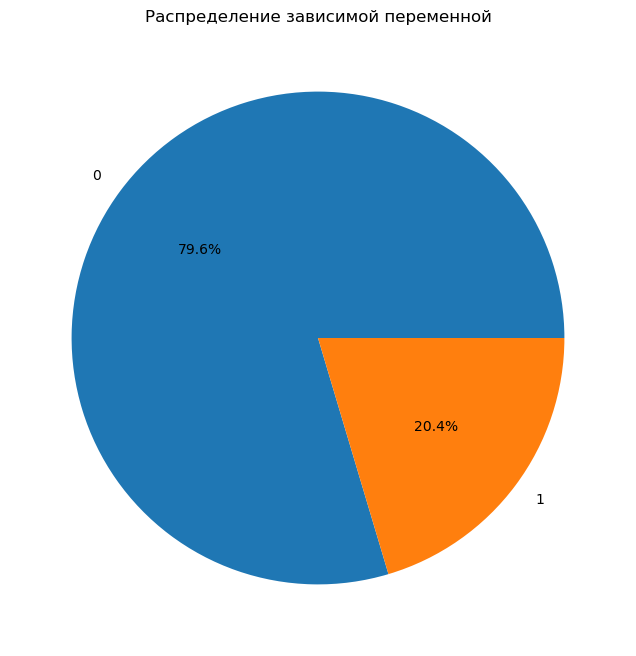

In [107]:
fig, axes = plt.subplots(figsize=(8, 8))
ax = plt.pie(data['Exited'].value_counts(), labels=data['Exited'].value_counts().index, autopct="%.1f%%",)
plt.title('Распределение зависимой переменной')
plt.show()

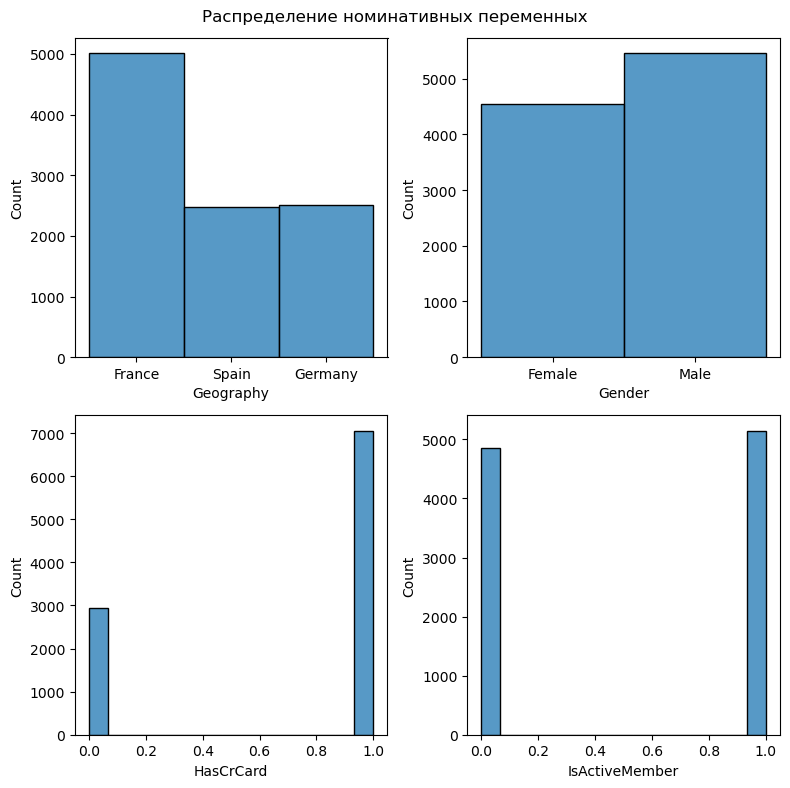

In [108]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
plt.suptitle('Распределение номинативных переменных')

sns.histplot(data=data, x='Geography', ax=axes[0][0])
sns.histplot(data=data, x='Gender', ax=axes[0][1])
sns.histplot(data=data, x='HasCrCard', ax=axes[1][0])
sns.histplot(data=data, x='IsActiveMember', ax=axes[1][1])

plt.tight_layout()
plt.show()

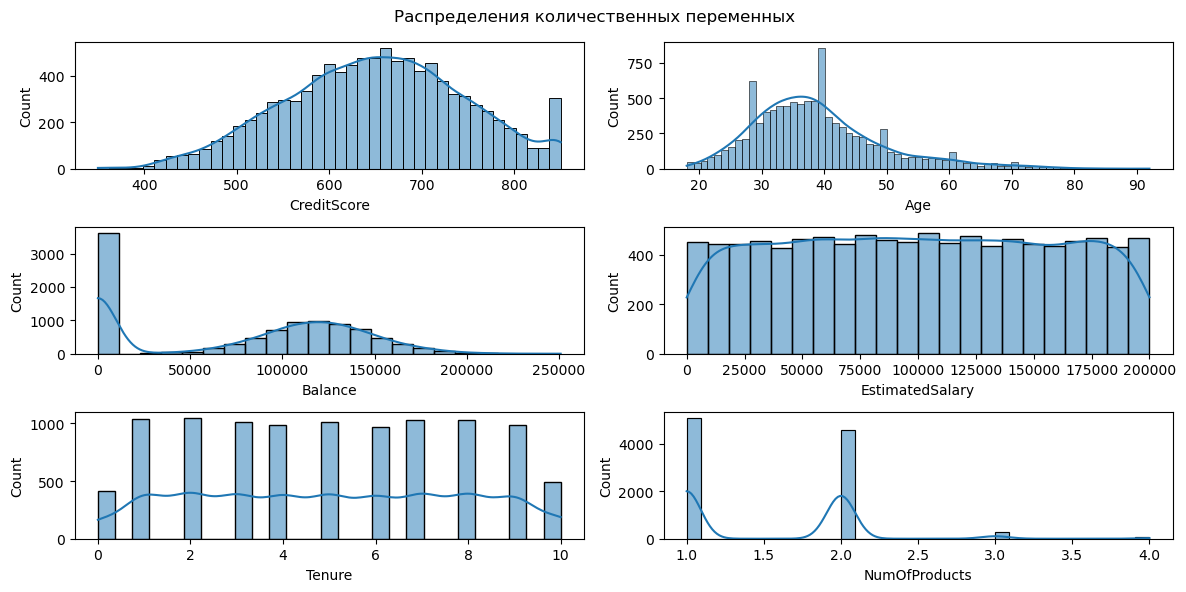

In [109]:
fig, axes = plt.subplots(3, 2, figsize=(12, 6))
fig.suptitle('Распределения количественных переменных')

sns.histplot(data=data, x='CreditScore', kde=True, ax=axes[0][0])
sns.histplot(data=data, x='Age', kde=True, ax=axes[0][1])
sns.histplot(data=data, x='Balance', kde=True, ax=axes[1][0])
sns.histplot(data=data, x='EstimatedSalary', kde=True, ax=axes[1][1])
sns.histplot(data=data, x='Tenure', kde=True, ax=axes[2][0])
sns.histplot(data=data, x='NumOfProducts', kde=True, ax=axes[2][1])

plt.tight_layout()
plt.show()

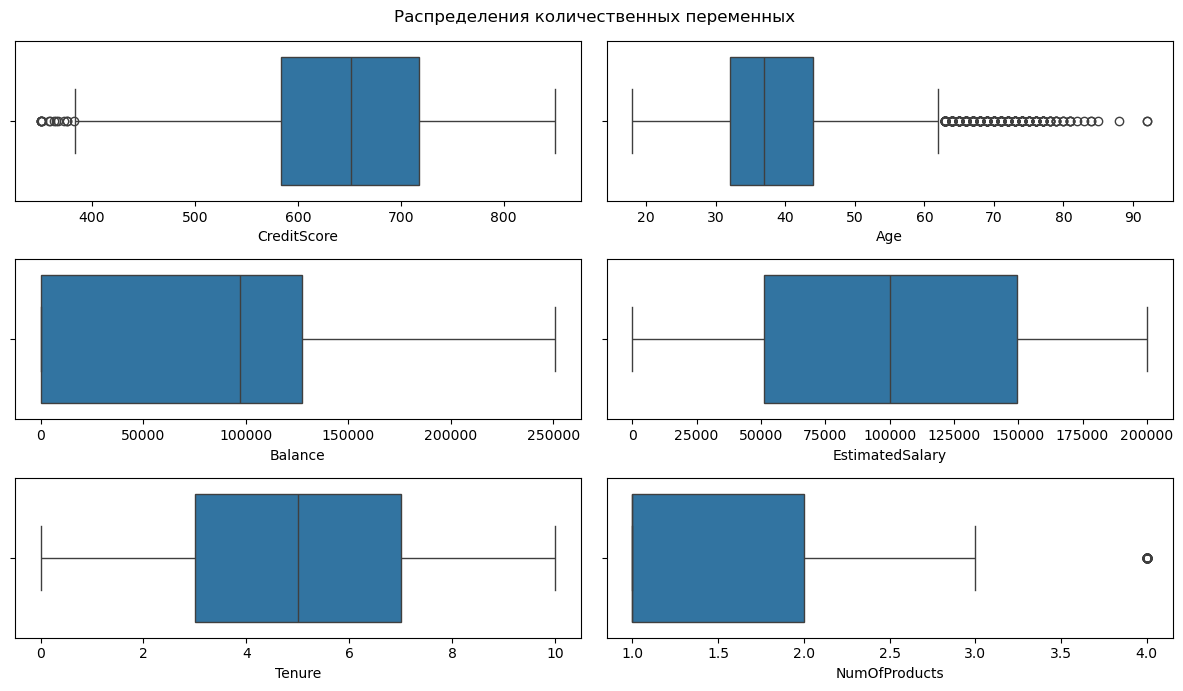

In [110]:
fig, axes = plt.subplots(3, 2, figsize=(12, 7))
fig.suptitle('Распределения количественных переменных')

sns.boxplot(data=data, x='CreditScore', ax=axes[0][0])
sns.boxplot(data=data, x='Age', ax=axes[0][1])
sns.boxplot(data=data, x='Balance', ax=axes[1][0])
sns.boxplot(data=data, x='EstimatedSalary', ax=axes[1][1])
sns.boxplot(data=data, x='Tenure', ax=axes[2][0])
sns.boxplot(data=data, x='NumOfProducts', ax=axes[2][1])

plt.tight_layout()
plt.show()

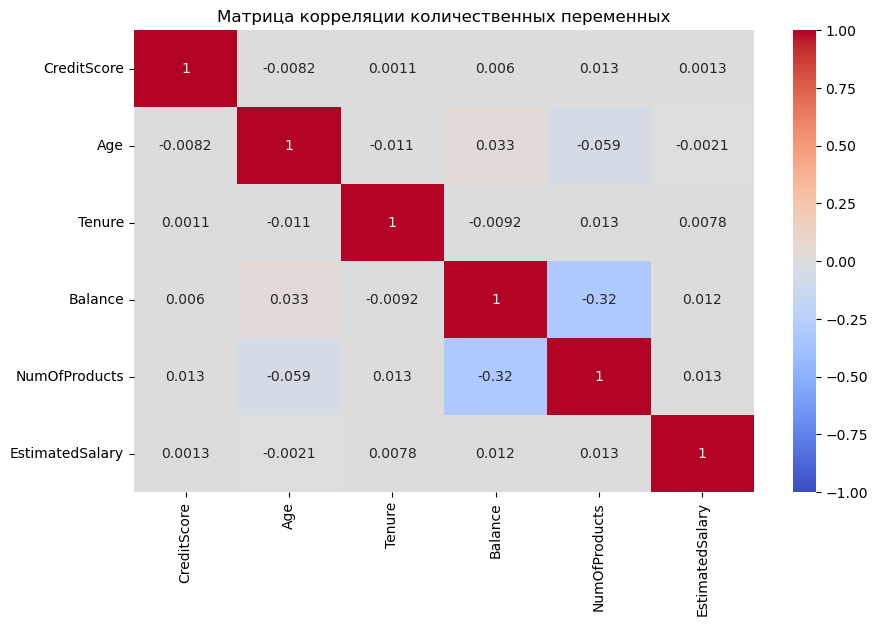

In [111]:
fig, axes = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(num_cols.corr(method='spearman'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_title('Матрица корреляции количественных переменных')
plt.show()

In [112]:
MeanPerHuman = data.groupby(['Geography', 'Gender', 'Exited']).agg(avgSalary=('EstimatedSalary', 'mean')).reset_index()

MeanPerHuman

,Geography,Gender,Exited,avgSalary
0,France,Female,0,98493.337808
1,France,Female,1,103626.025065
2,France,Male,0,99793.810083
3,France,Male,1,103193.839686
4,Germany,Female,0,103987.042242
5,Germany,Female,1,99884.458728
6,Germany,Male,0,101181.577505
7,Germany,Male,1,96581.511117
8,Spain,Female,0,98923.772252
9,Spain,Female,1,107544.095758


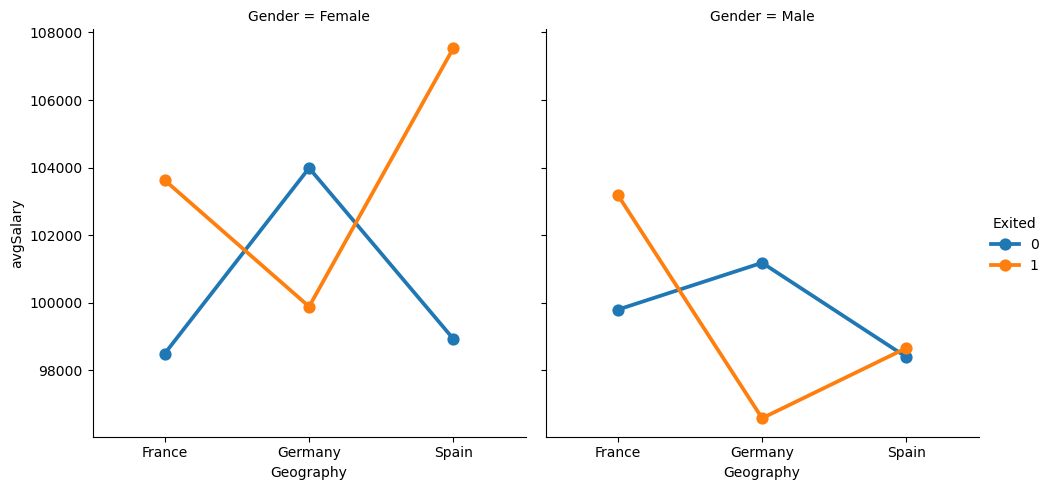

In [113]:
sns.catplot(x=MeanPerHuman.Geography, y=MeanPerHuman.avgSalary, hue=MeanPerHuman.Exited, col=MeanPerHuman.Gender, kind='point')
plt.show()

In [114]:
exited = data.groupby(['Geography', 'Gender', 'Exited',]).agg(ExitedCounter=('Exited', 'count')).reset_index()

exited

,Geography,Gender,Exited,ExitedCounter
0,France,Female,0,1802
1,France,Female,1,460
2,France,Male,0,2400
3,France,Male,1,350
4,Germany,Female,0,745
5,Germany,Female,1,448
6,Germany,Male,0,950
7,Germany,Male,1,367
8,Spain,Female,0,857
9,Spain,Female,1,231


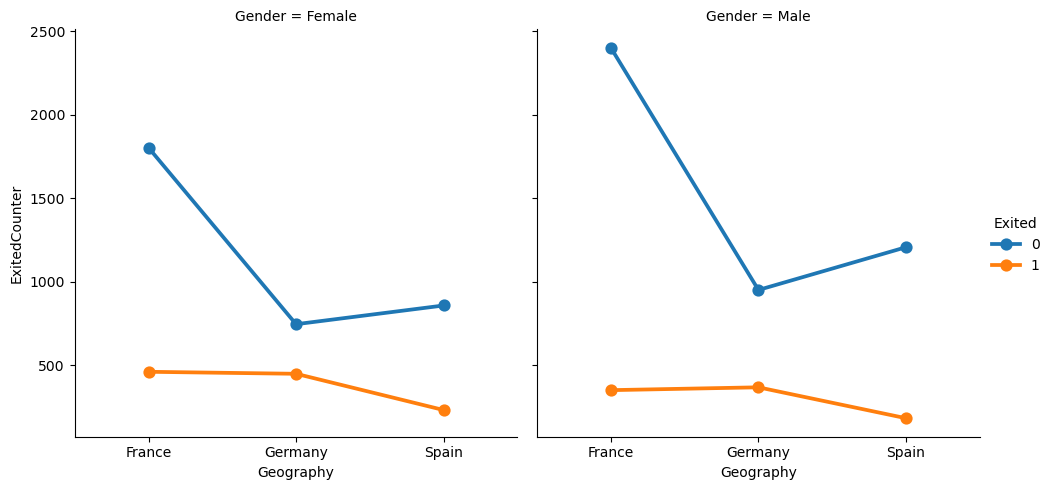

In [115]:
sns.catplot(y=exited.ExitedCounter, x=exited.Geography, hue=exited.Exited, col=exited.Gender, kind='point')
plt.show()

In [116]:
CScore = data.groupby(['Geography', 'Gender', 'Exited']).agg(meanCscore=('CreditScore', 'mean')).reset_index()

CScore

,Geography,Gender,Exited,meanCscore
0,France,Female,0,650.614872
1,France,Female,1,643.897826
2,France,Male,0,651.609583
3,France,Male,1,639.308571
4,Germany,Female,0,654.514094
5,Germany,Female,1,650.732143
6,Germany,Male,0,652.278947
7,Germany,Male,1,644.313351
8,Spain,Female,0,653.264877
9,Spain,Female,1,645.363636


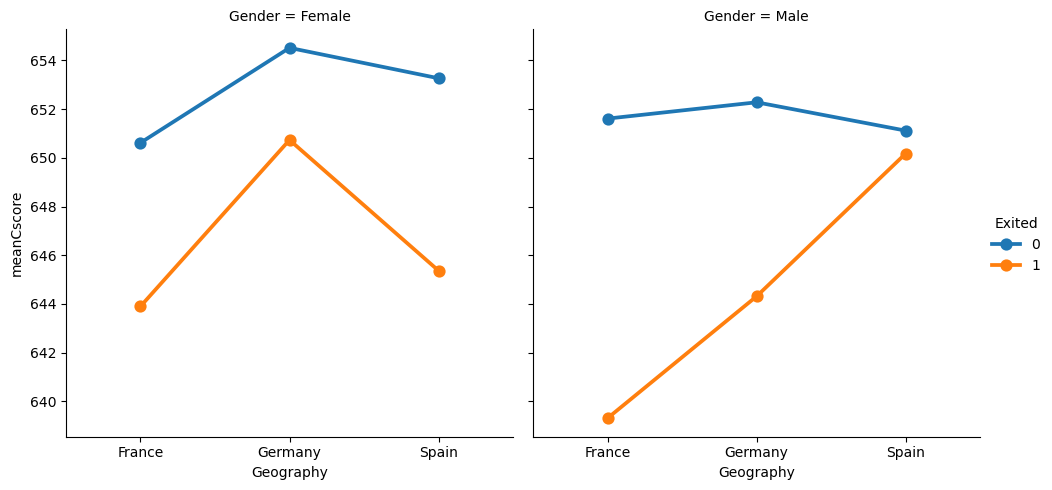

In [117]:
sns.catplot(y=CScore.meanCscore, x=CScore.Geography, hue=CScore.Exited, col=CScore.Gender, kind='point')
plt.show()

In [118]:
Ccard = data.groupby([ 'Geography', 'HasCrCard', 'Exited']).agg(avgCounter=('Exited', 'count')).reset_index()

Ccard

,Geography,HasCrCard,Exited,avgCounter
0,France,0,0,1229
1,France,0,1,241
2,France,1,0,2973
3,France,1,1,569
4,Germany,0,0,481
5,Germany,0,1,237
6,Germany,1,0,1214
7,Germany,1,1,578
8,Spain,0,0,621
9,Spain,0,1,135


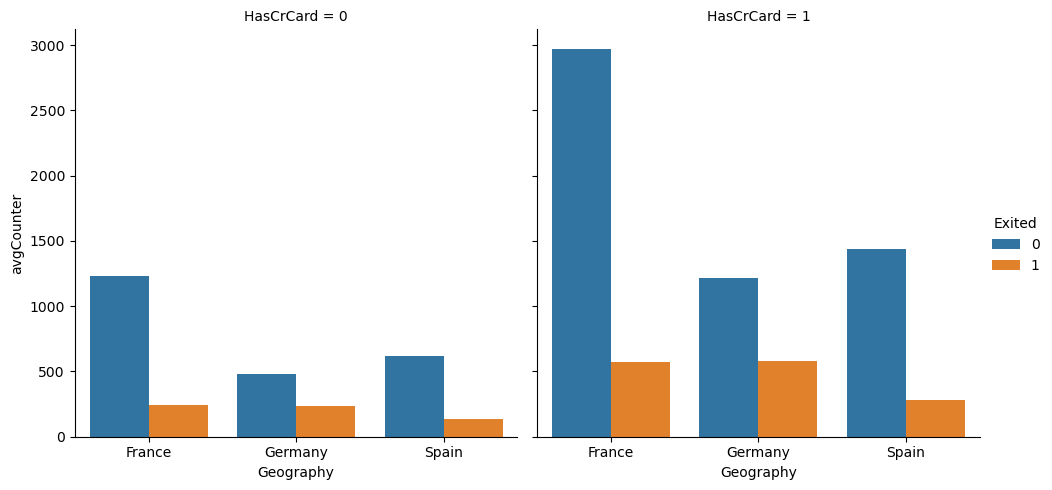

In [119]:
sns.catplot(x=Ccard.Geography, y=Ccard.avgCounter, hue=Ccard.Exited, col=Ccard.HasCrCard, kind='bar')
plt.show()

In [120]:
Pnumber = data.groupby(['NumOfProducts', 'Exited']).agg(Count=('Exited', 'count')).reset_index()

Pnumber

,NumOfProducts,Exited,Count
0,1,0,3674
1,1,1,1409
2,2,0,4240
3,2,1,349
4,3,0,46
5,3,1,220
6,4,1,60


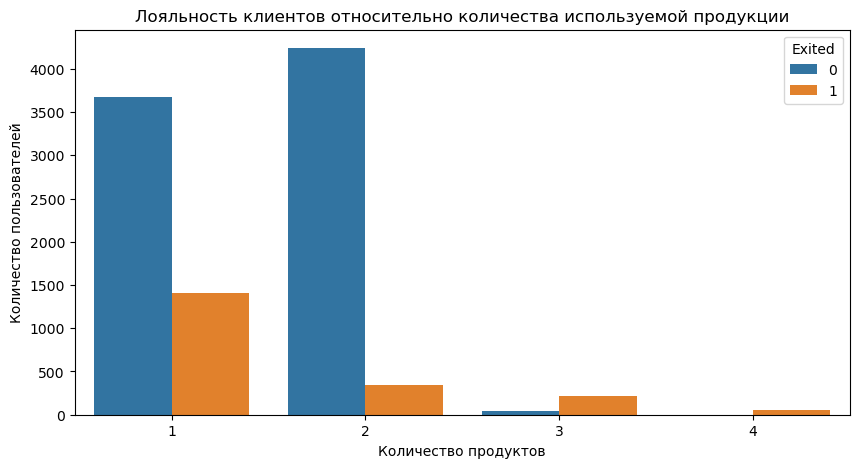

In [121]:
fig, axis = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=Pnumber.NumOfProducts, y=Pnumber.Count, hue=Pnumber.Exited)
ax.set_xlabel('Количество продуктов')
ax.set_ylabel('Количество пользователей')
ax.set_title('Лояльность клиентов относительно количества используемой продукции')
plt.show()

In [122]:
Tnumber = data.groupby(['Tenure', 'Exited']).agg(Count=('Exited', 'count')).reset_index()

Tnumber

,Tenure,Exited,Count
0,0,0,318
1,0,1,95
2,1,0,803
3,1,1,232
4,2,0,845
5,2,1,201
6,3,0,796
7,3,1,214
8,4,0,786
9,4,1,203


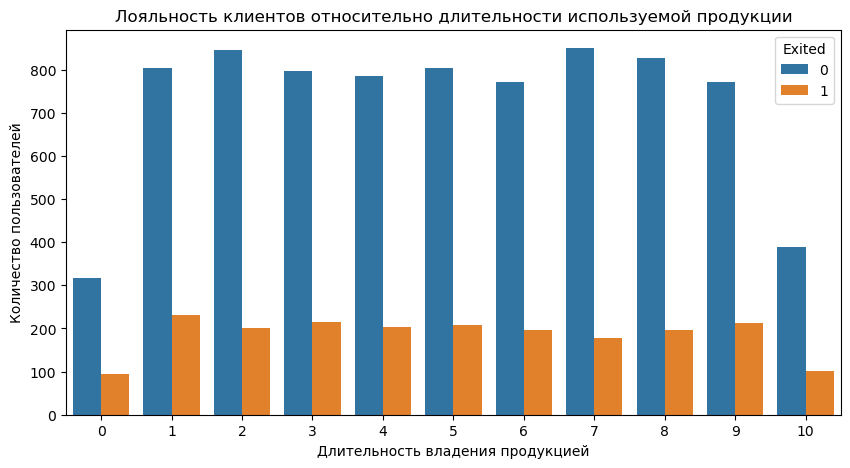

In [123]:
fig, axis = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=Tnumber.Tenure, y=Tnumber.Count, hue=Tnumber.Exited)
ax.set_xlabel('Длительность владения продукцией')
ax.set_ylabel('Количество пользователей')
ax.set_title('Лояльность клиентов относительно длительности используемой продукции')
plt.show()